# MULTIPLE LINEAR REGRESSION

### Assignment Task:
perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [1]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np

In [2]:
#Load and read .csv file
df=pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
#Find the shape of the dataset
df.shape

(1436, 11)

In [4]:
#Get the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
#Check for null values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
#Check for duplicate rows
df.duplicated().sum()
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [7]:
#drop the duplicate rows
df.drop_duplicates(inplace=True,ignore_index=True)

In [8]:
#take copy of df and store it in df_new
df_new = df.copy()

# Convert the 'Automatic' column to numeric type; any non-numeric values will be set as NaN
df_new['Automatic'] = pd.to_numeric(df_new['Automatic'], errors='coerce')
# Replace any NaN values with 0
df_new['Automatic'] = df_new['Automatic'].fillna(0)
# Convert the column to integer type
df_new['Automatic'] = df_new['Automatic'].astype(int)

# Convert the 'Doors' column to numeric type; any non-numeric values will be set as NaN
df_new['Doors'] = pd.to_numeric(df_new['Doors'], errors='coerce')
# Fill NaN values with the most frequent value (mode) in the 'Doors' column
df_new['Doors'] = df_new['Doors'].fillna(df_new['Doors'].mode()[0])
# Convert the column to integer type
df_new['Doors'] = df_new['Doors'].astype(int)

df_new.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [9]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

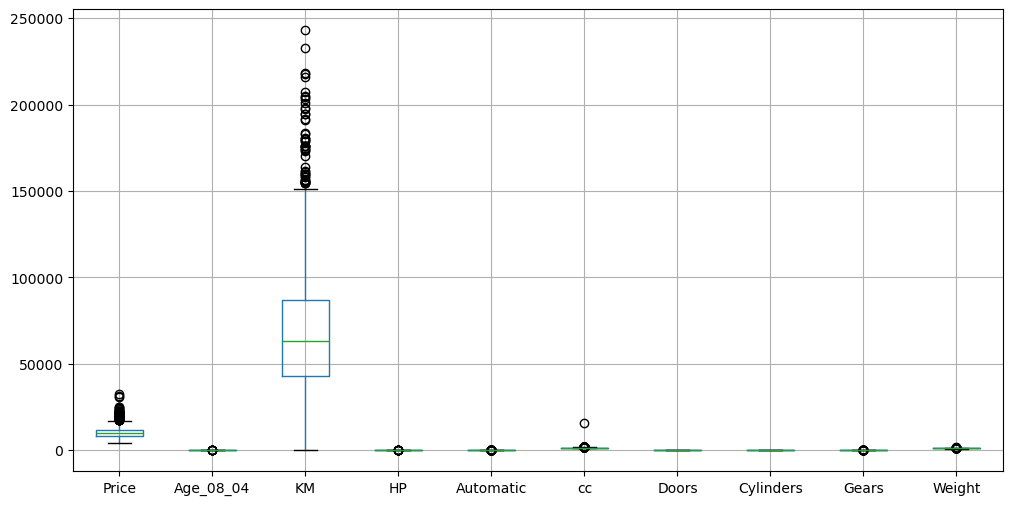

In [10]:
#create boxplot to check outliers
plt.figure(figsize=(12, 6))
df_new.boxplot()

In [11]:
### outlier capping
def outlier_capping(df_new,column):
    Q1= df_new[column].quantile(0.25)
    Q3= df_new[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df_new[column]= df_new[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x) 
for col in df_new.select_dtypes(['int','float']).columns:
    outlier_capping(df_new,col)

<Axes: >

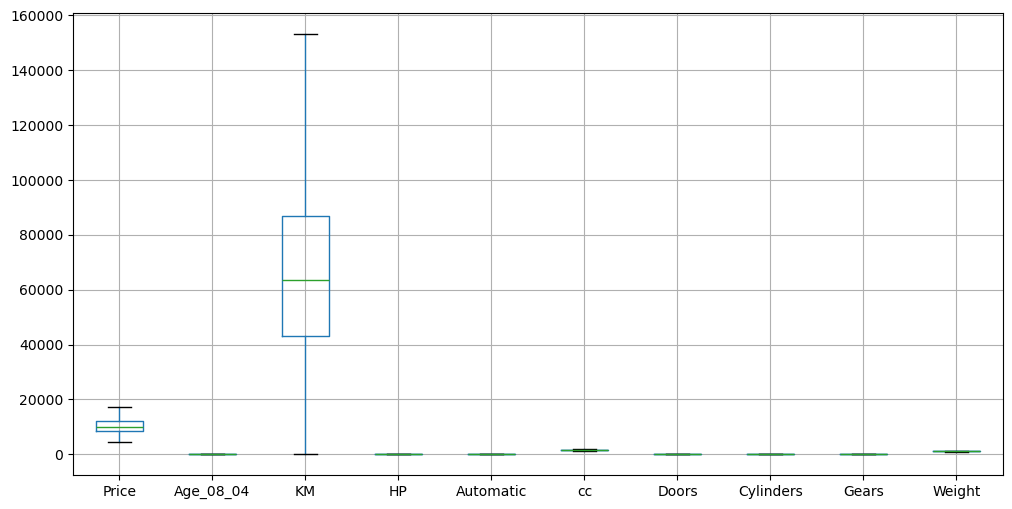

In [12]:
#Check for outliers after outlier capping
plt.figure(figsize=(12, 6))
df_new.boxplot()

In [13]:
#Summarize the dataset distribution
df_new.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000,1435.0,1435.0,1435.000000
mean,10495.964460,55.992334,67644.520383,101.093380,0.0,1558.327526,4.032753,4.0,5.0,1068.520906
std,2977.598549,18.529725,34725.393258,13.146145,0.0,168.788311,0.952667,0.0,0.0,37.722708
min,4350.000000,5.000000,1.000000,69.000000,0.0,1300.000000,2.000000,4.0,5.0,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.0,1400.000000,3.000000,4.0,5.0,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.0,1600.000000,4.000000,4.0,5.0,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.0,1600.000000,5.000000,4.0,5.0,1085.000000
max,17200.000000,80.000000,153103.750000,140.000000,0.0,1900.000000,5.000000,4.0,5.0,1152.500000


In [14]:
#seperate categorical and numeric columns
cat_cols=df_new.select_dtypes(include='object')
num_cols=df_new.select_dtypes(include='number')
print("categorical cols:",cat_cols.columns.tolist())
print("numerical cols:",num_cols.columns.tolist())

categorical cols: ['Fuel_Type']
numerical cols: ['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']


In [16]:
# apply get dummies encoding for categorical columns
encoded_df=pd.get_dummies(cat_cols, columns=cat_cols.columns,drop_first=True)
encoded_df=encoded_df.astype(int)
encoded_df.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [17]:
#import scaling library
from sklearn.preprocessing import StandardScaler

In [18]:
# apply Standard scalar for numerical columns
std_sca = StandardScaler()
scaled=std_sca.fit_transform(num_cols)
scaled_df = pd.DataFrame(scaled, columns=num_cols.columns, index=df_new.index)
scaled_df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,1.009230,-1.781129,-0.595118,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997
1,1.093220,-1.781129,0.152463,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997
2,1.160412,-1.727143,-0.747078,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997
3,1.496370,-1.619171,-0.565908,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997
4,1.093220,-1.403226,-0.839578,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997


In [19]:
#Find the correlation between the numeric columns
corr=num_cols.corr()
corr

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.895340,-0.607949,0.254427,NaN,0.129352,0.183010,NaN,NaN,0.507823
Age_08_04,-0.895340,1.000000,0.530670,-0.129602,NaN,-0.136644,-0.146704,NaN,NaN,-0.476150
KM,-0.607949,0.530670,1.000000,-0.329729,NaN,0.258680,-0.036618,NaN,NaN,0.000977
HP,0.254427,-0.129602,-0.329729,1.000000,NaN,0.098192,0.120139,NaN,NaN,0.024877
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.129352,-0.136644,0.258680,0.098192,NaN,1.000000,0.138433,NaN,NaN,0.717782
Doors,0.183010,-0.146704,-0.036618,0.120139,NaN,0.138433,1.000000,NaN,NaN,0.381177
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.507823,-0.476150,0.000977,0.024877,NaN,0.717782,0.381177,NaN,NaN,1.000000


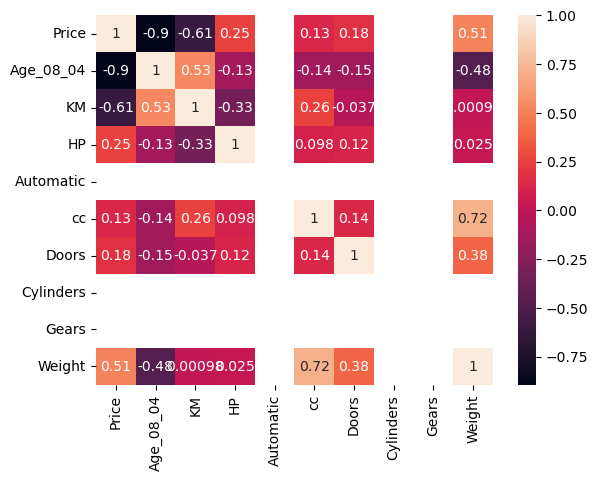

In [20]:
#create heatmap for visualization
sns.heatmap(corr,annot=True)
plt.show()

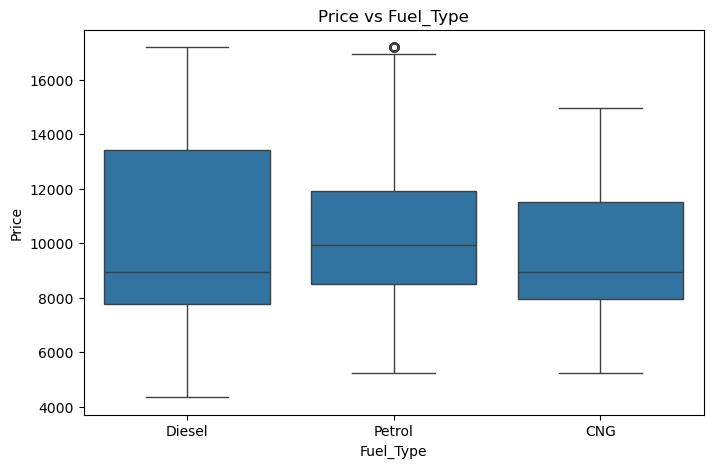

In [21]:
#Create boxplot for categorical columns with price column
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel_Type', y='Price', data=df_new)
plt.title('Price vs Fuel_Type')
plt.show()

In [22]:
#import VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [23]:
### Check for Multicolinearity and Variance_Inflation_factor
num_features=num_cols.drop(columns='Price')
vif= pd.DataFrame()
vif['num_features']=num_features.columns
vif['VIF']= [variance_inflation_factor(num_features.values,i) for i in range(len(num_features.columns))]

num_features.values

array([[2.3000e+01, 4.6986e+04, 9.0000e+01, ..., 4.0000e+00, 5.0000e+00,
        1.1525e+03],
       [2.3000e+01, 7.2937e+04, 9.0000e+01, ..., 4.0000e+00, 5.0000e+00,
        1.1525e+03],
       [2.4000e+01, 4.1711e+04, 9.0000e+01, ..., 4.0000e+00, 5.0000e+00,
        1.1525e+03],
       ...,
       [7.1000e+01, 1.7016e+04, 8.6000e+01, ..., 4.0000e+00, 5.0000e+00,
        1.0150e+03],
       [7.0000e+01, 1.6916e+04, 8.6000e+01, ..., 4.0000e+00, 5.0000e+00,
        1.0150e+03],
       [7.6000e+01, 1.0000e+00, 1.1000e+02, ..., 4.0000e+00, 5.0000e+00,
        1.1140e+03]])

In [24]:
#find VIF value
vif.sort_values(by='VIF',ascending=False)

,num_features,VIF
8,Weight,3.704059
4,cc,2.824547
0,Age_08_04,2.114829
1,KM,1.920202
5,Doors,1.283791
2,HP,1.253571
6,Cylinders,0.000000
7,Gears,0.000000
3,Automatic,NaN


In [25]:
#concat categorical and numerical columns
final_df = pd.concat([scaled_df, encoded_df], axis=1) 
final_df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1.009230,-1.781129,-0.595118,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997,1,0
1,1.093220,-1.781129,0.152463,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997,1,0
2,1.160412,-1.727143,-0.747078,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997,1,0
3,1.496370,-1.619171,-0.565908,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997,1,0
4,1.093220,-1.403226,-0.839578,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997,1,0


In [26]:
#Split the target and feature columns
target=final_df['Price']
features=final_df.drop(columns=['Price'])

In [27]:
#import feature selection library
from sklearn.feature_selection import f_regression
import warnings
warnings.filterwarnings('ignore')

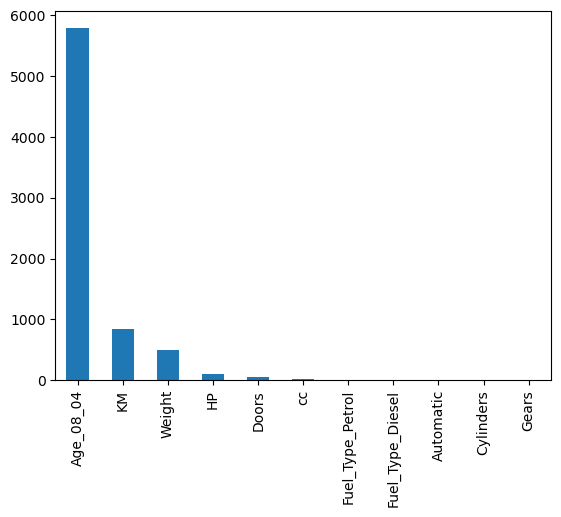

In [28]:
#Perform f_regression between each feature and the target
f_reg=f_regression(features,target)
pd.Series(f_reg[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [29]:
# Import the train_test_split function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [30]:
#Split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1148, 11)
(287, 11)
(1148,)
(287,)


### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [31]:
#import linear regression library
from sklearn.linear_model import LinearRegression

##### Model_1:

In [32]:
# correlation matrix
correlation_matrix = final_df.corr()

# Extract correlations with 'Price' and exclude self-correlation
price_corr = correlation_matrix['Price'].drop('Price') 

# Get top 5 features by absolute correlation
top5_features = price_corr.abs().sort_values(ascending=False).head(5).index.tolist()
print(top5_features)


['Age_08_04', 'KM', 'Weight', 'HP', 'Doors']


In [33]:
#Train the MLR Model
# Build Model 1 Using top 5 correlation features
model1 = LinearRegression()
m1 = model1.fit(x_train[top5_features], y_train)
display(m1)

print("Model_1 - Top 5 correlation features:",top5_features)
print("-" * 100)
print("Intercept:", model1.intercept_)
print("-" * 100)
print("Coefficients:", model1.coef_)

LinearRegression()

Model_1 - Top 5 correlation features: ['Age_08_04', 'KM', 'Weight', 'HP', 'Doors']
----------------------------------------------------------------------------------------------------
Intercept: -0.005314728595604135
----------------------------------------------------------------------------------------------------
Coefficients: [-0.67353243 -0.22062095  0.18694886  0.09961983 -0.01081677]


##### Model_2

In [35]:
#Train the MLR Model
# Build Model 2 Using all features
model2 = LinearRegression()
m2 = model2.fit(x_train, y_train)
display(m2)
print("Model_2-Using all features:",x_train.columns.tolist())
print("-" * 100)
print("Intercept:", model2.intercept_)
print("-" * 100)
print("Coefficients:", model2.coef_)

LinearRegression()

Model_2-Using all features: ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
----------------------------------------------------------------------------------------------------
Intercept: -0.33840069758486235
----------------------------------------------------------------------------------------------------
Coefficients: [-6.53142248e-01 -1.73274210e-01  1.32421883e-01 -7.63278329e-17
 -1.54805550e-01 -4.10831832e-02 -4.85722573e-17  0.00000000e+00
  3.24825592e-01  3.17842684e-01  3.39084381e-01]


##### Model_3

In [36]:
#Train the MLR Model
# Build Model 3 Using ['Age_08_04', 'KM', 'Weight'] features
model3 = LinearRegression()
features3 = ['Age_08_04', 'KM', 'HP']
m3 = model3.fit(x_train[features3], y_train)
display(m3)
print("Model_3 - Using features:",features3)
print("-" * 100)
print("Intercept:", model3.intercept_)
print("-" * 100)
print("Coefficients:", model3.coef_)

LinearRegression()

Model_3 - Using features: ['Age_08_04', 'KM', 'HP']
----------------------------------------------------------------------------------------------------
Intercept: -0.006597613626579247
----------------------------------------------------------------------------------------------------
Coefficients: [-0.79729446 -0.15124097  0.1101351 ]


### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

##### Model_1:Evaluation

In [37]:
#import model Evaluation libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
# Model 1 Evaluation
y_pred1 = model1.predict(x_test[top5_features])
mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1) 
r2_1 = r2_score(y_test, y_pred1)

print("Model_1 Evaluation:")
print("-" * 20)
print(f"MAE: {mae1:.4f}")
print(f"MSE: {mse1:.4f}")
print(f"RMSE: {rmse1:.4f}")
print(f"R-squared: {r2_1:.4f}")
print("-" * 20)

Model_1 Evaluation:
--------------------
MAE: 0.3007
MSE: 0.1477
RMSE: 0.3843
R-squared: 0.8465
--------------------


##### Model_2:Evaluation

In [39]:
# Model 2 Evaluation
y_pred2 = model2.predict(x_test)
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse1) 
r2_2 = r2_score(y_test, y_pred2)

print("Model_2 Evaluation:")
print("-" * 20)
print(f"MAE: {mae2:.4f}")
print(f"MSE: {mse2:.4f}")
print(f"RMSE: {rmse2:.4f}")
print(f"R-squared: {r2_2:.4f}")
print("-" * 20)

Model_2 Evaluation:
--------------------
MAE: 0.2937
MSE: 0.1439
RMSE: 0.3843
R-squared: 0.8505
--------------------


##### Model_3:Evaluation

In [40]:
# Model 3 Evaluation
y_pred3 = model3.predict(x_test[features3])
mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3) 
r2_3 = r2_score(y_test, y_pred3)

print("Model_3 Evaluation:")
print("-" * 20)
print(f"MAE: {mae3:.4f}")
print(f"MSE: {mse3:.4f}")
print(f"RMSE: {rmse3:.4f}")
print(f"R-squared: {r2_3:.4f}")
print("-" * 20)

Model_3 Evaluation:
--------------------
MAE: 0.3145
MSE: 0.1655
RMSE: 0.4068
R-squared: 0.8281
--------------------


##### Result Comparision 

In [41]:
# model performances result
result={
    'Model': ['Model_1','Model_2', 'Model_3'],
    'Features': ['Top 5','All', 'Top 3'],
    'R²': [r2_1, r2_2, r2_3],
    'RMSE': [rmse1, rmse2, rmse3],
    'MAE': [mae1, mae2, mae3]
}
result_comp = pd.DataFrame(result)
display(result_comp)

,Model,Features,R²,RMSE,MAE
0,Model_1,Top 5,0.846531,0.384348,0.300718
1,Model_2,All,0.850484,0.384348,0.293665
2,Model_3,Top 3,0.828086,0.406791,0.314500


#### Key points:
- The performance of the models are evaluated using R², RMSE,MSE and MAE.
- The Model 2 which using all features, achieved the highest R² (≈ 0.85) and the lower RMSE(≈0.38)compared to other models Model_1 and Model_3.

### 5.Apply Lasso and Ridge methods on the model.

In [42]:
#import Lasso and Ridge packages
from sklearn.linear_model import Lasso, Ridge

##### Lasso Model

In [43]:
# Train the models with Lasso
lasso_model = Lasso(alpha=0.01) # we can mention the alpha value directly or import LassoCV which automatically calculate the best alpha value
lm = lasso_model.fit(x_train, y_train)
display(lm)

print("-" * 100)
print("Intercept:", lasso_model.intercept_)
print("-" * 100)
print("Coefficients:", lasso_model.coef_)

Lasso(alpha=0.01)

----------------------------------------------------------------------------------------------------
Intercept: -0.005314467261335768
----------------------------------------------------------------------------------------------------
Coefficients: [-0.66016875 -0.18930715  0.10996642  0.         -0.09754073 -0.01113779
  0.          0.          0.25354883 -0.          0.        ]


In [44]:
# Evaluate Lasso model
y_pred_lasso = lasso_model.predict(x_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Model Evaluation:")
print("-" * 20)
print(f"MAE: {mae_lasso:.4f}")
print(f"MSE: {mse_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.4f}")
print(f"R-squared: {r2_lasso:.4f}")
print("-" * 20)

Lasso Model Evaluation:
--------------------
MAE: 0.2946
MSE: 0.1452
RMSE: 0.3811
R-squared: 0.8491
--------------------


##### Ridge Model

In [45]:
# Train the models with Ridge
ridge_model = Ridge()
rm = ridge_model.fit(x_train, y_train)
display(rm)

print("-" * 100)
print("Intercept:", ridge_model.intercept_)
print("-" * 100)
print("Coefficients:", ridge_model.coef_)

Ridge()

----------------------------------------------------------------------------------------------------
Intercept: -0.29024221461061006
----------------------------------------------------------------------------------------------------
Coefficients: [-0.65303945 -0.17522173  0.12219401  0.         -0.14327436 -0.04082988
  0.          0.          0.3237765   0.23101378  0.29506144]


In [47]:
# Evaluate Ridge model
y_pred_ridge = ridge_model.predict(x_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Model Evaluation:")
print("-" * 20)
print(f"MAE: {mae_ridge:.4f}")
print(f"MSE: {mse_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"R-squared: {r2_ridge:.4f}")
print("-" * 20)

Ridge Model Evaluation:
--------------------
MAE: 0.2942
MSE: 0.1443
RMSE: 0.3799
R-squared: 0.8501
--------------------


In [48]:
# model performances result
final_result={
    'Model': ['Model_2','Lasso', 'Ridge'],
    'R²': [r2_2, r2_lasso, r2_ridge],
    'RMSE': [rmse1, rmse_lasso,rmse_ridge ],
    }
final_result_comp = pd.DataFrame(final_result)
display(final_result_comp)

,Model,R²,RMSE
0,Model_2,0.850484,0.384348
1,Lasso,0.849109,0.381107
2,Ridge,0.850051,0.379916


#### Interpretation:
- Ridge has achieved the highest R² (≈ 0.85) with the lower RMSE (0.379916), indicating slightly better predictive accuracy than the Model_2.

### Interview Questions:


#### 1.What is Normalization & Standardization and how is it helpful?
**Normalization (Min-Max Scaling):**

- Rescales the values of a numerical feature to a fixed range, usually between 0 and 1.

- The formula is: X_normalized = (X - X_min) / (X_max - X_min)

- Shrink everything into a fixed range [0,1]

**Standardization (Z-score Scaling):**

- Rescales the values of a numerical feature to have a mean of 0 and a standard deviation of 1.

- The formula is: X_standardized = (X - mean) / standard_deviation.

- Recenter and rescale the data around the mean.

**How it helpful:**

1.Make Features comparable

2.Speeds up training

3.Improves model accuracy

4.Prevents numerical instability

5.Makes visualization easier

6.standardization will works better than normalization for outliers



#### 2.What techniques can be used to address multicollinearity in multiple linear regression?
Multicollinearity occurs when independent variables in a multiple regression model are highly correlated. This can cause problems with interpreting the model coefficients and can lead to an unstable model. 
Here are some techniques to address multicollinearity:

##### => Check for Multicollinearity:
- **Correlation Matrix:** Calculate the correlation matrix of your independent variables. High correlation coefficients (e.g., above 0.8 or 0.9) between two variables indicate potential multicollinearity.

- **Variance Inflation Factor (VIF):** Calculate the VIF for each independent variable. VIF measures how much the variance of the estimated regression coefficient is increased due to multicollinearity. A VIF value greater than 5 or 10 is often considered indicative of significant multicollinearity.

##### => Address Multicollinearity:
- **Remove one of the highly correlated variables:** If two variables are highly correlated, we can remove one of them from the model. Choose the variable that is less theoretically important or has a weaker relationship with the dependent variable.

- **Combine the highly correlated variables:** Create a new variable that is a combination of the highly correlated variables (e.g., by averaging or summing them).

- **Use dimensionality reduction techniques:** Techniques like Principal Component Analysis (PCA) can be used to create a smaller set of uncorrelated variables that capture most of the variance in the original variables. These new variables can then be used in the regression model.

- **Use regularization techniques:** Lasso and Ridge regression are regularization techniques that can help mitigate the effects of multicollinearity by shrinking the regression coefficients. Ridge regression is particularly effective when dealing with multicollinearity.

- **Collect more data:** Sometimes, multicollinearity is a result of having a limited amount of data. Collecting more data can help to reduce the correlation between variables.